## Imports

In [1]:
import os
print(os.getcwd())
current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
os.chdir(parent_path)
#os.chdir('energy-analysis-and-predictions')
print(os.getcwd())

/home/araceli/code/energy-analysis-and-predictions/notebooks
/home/araceli/code/energy-analysis-and-predictions


In [75]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from utils.parameters import ENERGY_PRICE_FOLDER, \
                             ENERGY_COMPANIES_FOLDER
from load_data.load_energy_prices import load_energy_prices_data, \
                            load_energy_prices_from_all_files         
from predict_data.create_train_test_data import get_X_y_train_and_test_data, get_train_test_split
from predict_data.load_gru_model import load_gru_model          
from predict_data.registry import compile_model, fit_model,evaluate_model, predict                                          
from visualize_data.plot_price_with_interactive_timestamps import plot_price_with_interactive_timestamps   
from visualize_data.plot_model_history import plot_history


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Energy Prices 

## Load data for one file using years: 2018  and 2020 

In [70]:
folder_energy_test_2018 = os.path.join(ENERGY_PRICE_FOLDER, 'Gro_handelspreise_2018_01_01_2018_12_31_Tag.csv')
price_2018 = load_energy_prices_data(folder_energy_test_2018, 'Germany')
price_2018.head()

['Germany/Luxembourg [€/MWh]', '∅ residents Germany/Luxembourg [€/MWh]', 'Germany/Luxembourg/Austria [€/MWh]']
	Germany/Luxembourg [€/MWh]
		 count of not null values = 92
		 type is object


	∅ residents Germany/Luxembourg [€/MWh]
		 count of not null values = 0
	Germany/Luxembourg/Austria [€/MWh]
		 count of not null values = 273
		 type is object




/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_prices.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_prices.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Germany [€/MWh]
0,2018-01-01,-25.30
1,2018-01-02,33.44
2,2018-01-03,8.97
3,2018-01-04,29.86
4,2018-01-05,31.51


In [71]:
price_2018.dtypes

Date               datetime64[ns]
Germany [€/MWh]           float64
dtype: object

In [41]:
folder_energy_test_2020 = os.path.join(ENERGY_PRICE_FOLDER, 'Gro_handelspreise_2020_01_01_2020_12_31_Tag.csv')
price_2020 = load_energy_prices_data(folder_energy_test_2020, 'Germany')
price_2020.head()

Germany/Luxembourg [€/MWh]
count of not null values = 366
∅ residents Germany/Luxembourg [€/MWh]
count of not null values = 366
Germany/Luxembourg/Austria [€/MWh]
count of not null values = 0


,Date,Germany [€/MWh]
0,2020-01-01,33.700
1,2020-01-02,38.020
2,2020-01-03,29.595
3,2020-01-04,24.705
4,2020-01-05,34.835


## Energy price loading all files 

In [3]:
country = 'Germany'
folder = ENERGY_PRICE_FOLDER
energy_prices_df = load_energy_prices_from_all_files(folder, country)

Gro_handelspreise_2021_01_01_2021_12_31_Tag.csv
Index(['Date', 'Germany [€/MWh]'], dtype='object')
Index(['Germany [€/MWh]'], dtype='object')
Gro_handelspreise_2020_01_01_2020_12_31_Tag.csv
Index(['Date', 'Germany [€/MWh]'], dtype='object')
Index(['Germany [€/MWh]'], dtype='object')
Gro_handelspreise_2018_01_01_2018_12_31_Tag.csv
Index(['Date', 'Germany [€/MWh]'], dtype='object')
Index(['Germany [€/MWh]'], dtype='object')
Gro_handelspreise_2019_01_01_2019_12_31_Tag.csv
Index(['Date', 'Germany [€/MWh]'], dtype='object')
Index(['Germany [€/MWh]'], dtype='object')
Gro_handelspreise_2022_01_01_2022_12_31_Tag.csv
Index(['Date', 'Germany [€/MWh]'], dtype='object')
Index(['Germany [€/MWh]'], dtype='object')


/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_prices.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_prices.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_prices.py:45: SettingWithCopyWarning: 
A value is tryin

In [73]:
energy_prices_df.tail()

,Germany [€/MWh]
Date,
2022-12-27,99.195
2022-12-28,59.585
2022-12-29,29.065
2022-12-30,24.255
2022-12-31,10.930


In [74]:
energy_prices_df.dtypes

Germany [€/MWh]    float64
dtype: object

In [75]:
plot_price_with_interactive_timestamps(energy_prices_df, energy_prices_df.index, energy_prices_df.columns, 'Energy prices Germany', '[€/MWh]')

## Train and test split

In [117]:
TRAIN_TEST_SEQUENCE = math.ceil(energy_prices_df.shape[0] * 0.15)
print('INPUT_LENGTH_SPLIT =', TRAIN_TEST_SEQUENCE)
TRAIN_TEST_RATIO = 0.7
N_FEATURES = 1
OUTPUT_LENGTH = 1
FOLDS_SEQUENCE = 1
FOLD_LENGTH_RATIO = 0.66
TARGET = energy_prices_df.columns[0]

INPUT_LENGTH_SPLIT = 281


In [118]:
X_train, y_train, X_test, y_test = get_X_y_train_and_test_data(energy_prices_df,
                                TRAIN_TEST_RATIO,
                                TRAIN_TEST_SEQUENCE,
                                FOLD_LENGTH_RATIO,
                                FOLDS_SEQUENCE,
                                OUTPUT_LENGTH,
                                TARGET) 

length train data 1307
length test data 841
folds length = 554
753 train folds generated
287 test folds generated


In [119]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape = {y_test.shape}')
print(f'energy_prices_df.shape = {energy_prices_df.shape}')

X_train.shape = (753, 554, 1)
X_test.shape = (287, 554, 1)
y_train.shape = (753, 1, 1)
y_test.shape = (287, 1, 1)
energy_prices_df.shape = (1867, 1)


In [120]:
628 + 604

1232

In [121]:
len_train = round(energy_prices_df.shape[0]*TRAIN_TEST_RATIO)
len_test = energy_prices_df.shape[0]- len_train + TRAIN_TEST_SEQUENCE

INPUT_LENGTH_FOLD_TEST = round((len_test - OUTPUT_LENGTH)*FOLD_LENGTH_RATIO)
print('INPUT_LENGTH_FOLDS =', INPUT_LENGTH_FOLD_TEST)

total_number_train_folds = len_train - INPUT_LENGTH_FOLD_TEST - OUTPUT_LENGTH + FOLDS_SEQUENCE
total_number_test_folds = len_test - INPUT_LENGTH_FOLD_TEST - OUTPUT_LENGTH + FOLDS_SEQUENCE
print(f'{total_number_train_folds} train folds generated')
print(f'{total_number_test_folds} test folds generated')

INPUT_LENGTH_FOLDS = 554
753 train folds generated
287 test folds generated


In [122]:
assert X_train.shape == (total_number_train_folds, INPUT_LENGTH_FOLD_TEST, N_FEATURES)
assert X_test.shape == (total_number_test_folds, INPUT_LENGTH_FOLD_TEST, N_FEATURES)

## Model and predict

In [128]:
model = load_gru_model(X_train, y_train, 64, 32, 'L1L2', 0.05)

In [129]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 554, 64)           12864     
                                                                 
 gru_9 (GRU)                 (None, 32)                9408      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 22,305
Trainable params: 22,305
Non-trainable params: 0
_________________________________________________________________


In [131]:
model = compile_model(model, learning_rate=0.02, optimizer="rmsprop", metric="mae")

In [134]:
patience = 25
epochs = 100
batch_size = 32
(fited_model, history) = fit_model(model, X_train, y_train, patience, epochs, batch_size)

Epoch 1/100
17/17 [==============================] - 6s 325ms/step - loss: 84.4884 - mae: 6.9507 - val_loss: 595.1006 - val_mae: 21.9300
Epoch 2/100
17/17 [==============================] - 5s 323ms/step - loss: 87.2586 - mae: 6.9787 - val_loss: 359.1057 - val_mae: 15.9557
Epoch 3/100
17/17 [==============================] - 5s 324ms/step - loss: 73.1909 - mae: 6.3427 - val_loss: 322.9411 - val_mae: 14.6214
Epoch 4/100
17/17 [==============================] - 5s 320ms/step - loss: 69.4597 - mae: 6.0101 - val_loss: 351.5931 - val_mae: 15.5892
Epoch 5/100
17/17 [==============================] - 5s 321ms/step - loss: 78.3180 - mae: 6.6818 - val_loss: 380.6568 - val_mae: 16.1502
Epoch 6/100
17/17 [==============================] - 5s 323ms/step - loss: 77.7725 - mae: 6.6420 - val_loss: 446.4104 - val_mae: 18.2662
Epoch 7/100
17/17 [==============================] - 5s 323ms/step - loss: 72.5762 - mae: 6.2588 - val_loss: 374.0302 - val_mae: 16.3860
Epoch 8/100
17/17 [======================

array([<AxesSubplot:title={'center':'MSE'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot:title={'center':'MAE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

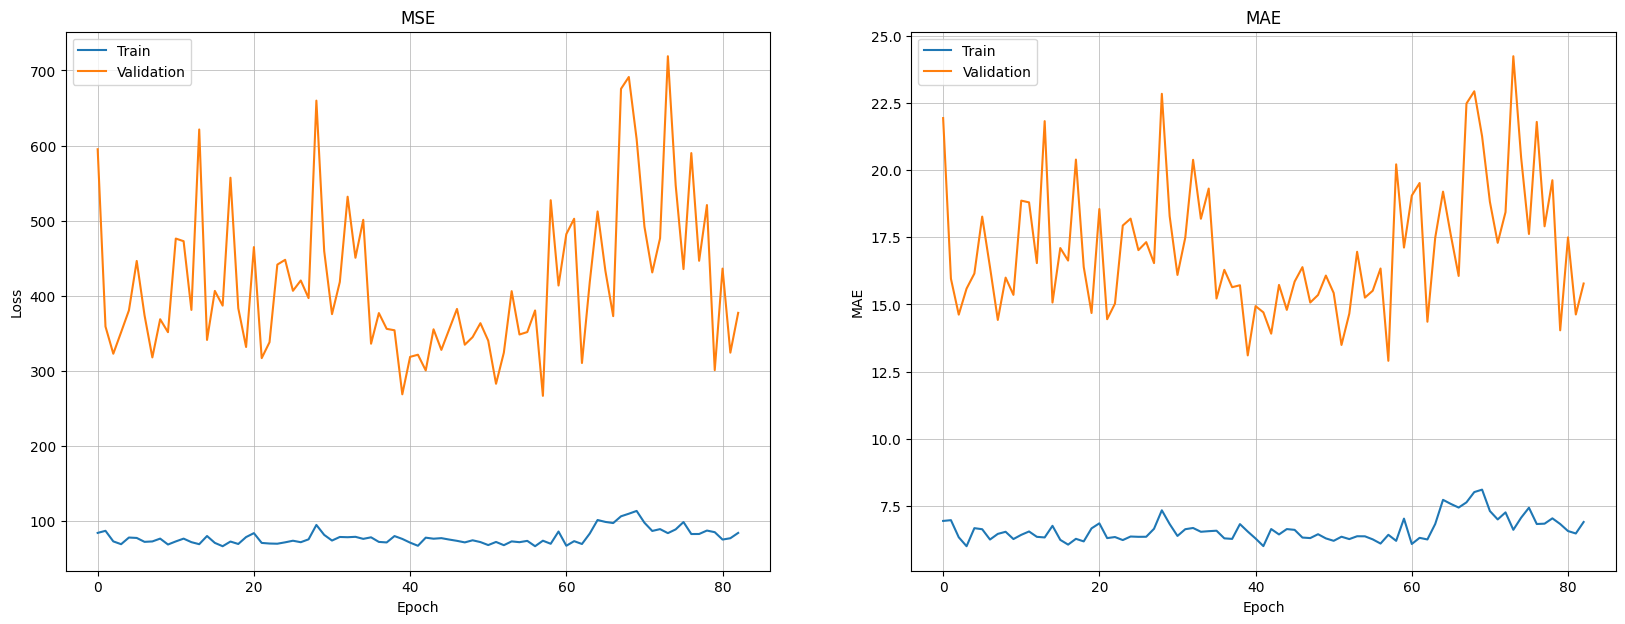

In [135]:
plot_history(history)

In [67]:
result_evaluate = evaluate_model(model, X_test, y_test)

10/10 [==============================] - 1s 98ms/step - loss: 64313.3398 - mae: 221.9372


In [49]:
type(result_evaluate)

list

In [50]:
result_evaluate

[56532.76953125, 204.5142364501953]

In [72]:
y_pre = predict(model, X_test)

10/10 [==============================] - 1s 96ms/step


In [74]:
y_pre.shape

(312, 1)

In [76]:
(train_data, test_data)= get_train_test_split(energy_prices_df, TRAIN_TEST_RATIO, TRAIN_TEST_SEQUENCE)
print(f'{train_data.shape}')
print(f'{test_data.shape}')

length train data 1232
length test data 916
(1232, 1)
(916, 1)


In [53]:
X_test.shape

(312, 604, 1)

In [54]:
y_test.shape

(312, 1, 1)

# Investigate Data from Commercial foreign trade (Kommerzieler Ausserhandel Preis)

In [33]:
foreing_trade = pd.read_csv('data-prices/Kommerzieller_Au_enhandel_2018_01_01_2018_12_31_Tag.csv', delimiter=';', decimal=',')
foreing_trade.head()

,Datum,Anfang,Ende,Nettoexport [MWh] Berechnete Auflösungen,Niederlande (Export) [MWh] Berechnete Auflösungen,Niederlande (Import) [MWh] Berechnete Auflösungen,Schweiz (Export) [MWh] Berechnete Auflösungen,Schweiz (Import) [MWh] Berechnete Auflösungen,Dänemark (Export) [MWh] Berechnete Auflösungen,Dänemark (Import) [MWh] Berechnete Auflösungen,...,Österreich (Export) [MWh] Berechnete Auflösungen,Österreich (Import) [MWh] Berechnete Auflösungen,Frankreich (Export) [MWh] Berechnete Auflösungen,Frankreich (Import) [MWh] Berechnete Auflösungen,Polen (Export) [MWh] Berechnete Auflösungen,Polen (Import) [MWh] Berechnete Auflösungen,Norwegen (Export) [MWh] Berechnete Auflösungen,Norwegen (Import) [MWh] Berechnete Auflösungen,Belgien (Export) [MWh] Berechnete Auflösungen,Belgien (Import) [MWh] Berechnete Auflösungen
0,01.01.2018,00:00,00:00,-,24.439,-172,19.250,-678,50.485,-85,...,120.809,-20.152,87.570,-14.248,2.933,-658,-,-,-,-
1,02.01.2018,00:00,00:00,-,55.880,-241,19.200,-287,18.874,-23.448,...,113.103,-52.742,36.463,-22.596,6.480,-581,-,-,-,-
2,03.01.2018,00:00,00:00,-,34.481,-24,19.202,-2,50.400,-30,...,135.379,-17.455,22.298,-2.909,6.688,0,-,-,-,-
3,04.01.2018,00:00,00:00,-,51.926,-2.052,21.722,-194,18.831,-26.153,...,120.083,-49.424,52.353,-32.326,2.663,-650,-,-,-,-
4,05.01.2018,00:00,00:00,-,58.059,-837,23.375,-4.317,15.987,-24.934,...,121.300,-44.237,63.425,-23.055,1.385,-7.027,-,-,-,-


In [38]:
foreing_trade.columns

Index(['Datum', 'Anfang', 'Ende', 'Nettoexport [MWh] Berechnete Auflösungen',
       'Niederlande (Export) [MWh] Berechnete Auflösungen',
       'Niederlande (Import) [MWh] Berechnete Auflösungen',
       'Schweiz (Export) [MWh] Berechnete Auflösungen',
       'Schweiz (Import) [MWh] Berechnete Auflösungen',
       'Dänemark (Export) [MWh] Berechnete Auflösungen',
       'Dänemark (Import) [MWh] Berechnete Auflösungen',
       'Tschechien (Export) [MWh] Berechnete Auflösungen',
       'Tschechien (Import) [MWh] Berechnete Auflösungen',
       'Luxemburg (Export) [MWh] Berechnete Auflösungen',
       'Luxemburg (Import) [MWh] Berechnete Auflösungen',
       'Schweden (Export) [MWh] Berechnete Auflösungen',
       'Schweden (Import) [MWh] Berechnete Auflösungen',
       'Österreich (Export) [MWh] Berechnete Auflösungen',
       'Österreich (Import) [MWh] Berechnete Auflösungen',
       'Frankreich (Export) [MWh] Berechnete Auflösungen',
       'Frankreich (Import) [MWh] Berechnete Auflös

In [42]:
foreing_trade['Date'] = pd.to_datetime(foreing_trade['Date'], yearfirst=True)

In [37]:
foreing_trade['Nettoexport [MWh] Berechnete Auflösungen'].value_counts(normalize=True)

-    1.0
Name: Nettoexport [MWh] Berechnete Auflösungen, dtype: float64

In [39]:
foreing_trade['Norwegen (Import) [MWh] Berechnete Auflösungen'].value_counts(normalize=True)

-    1.0
Name: Norwegen (Import) [MWh] Berechnete Auflösungen, dtype: float64

# Investigate data from physical flow of electricity (physikalischer Stromfluss)

In [ ]:
electricity_flow = pd.read_csv('SMARD/data-prices/Physikalischer_Stromfluss_2018_01_01_2018_12_31_Tag.csv', delimiter=';', decimal=',')
electricity_flow.head()

In [43]:
electricity_flow.shape

(365, 26)

In [44]:
electricity_flow['Nettoexport [MWh] Berechnete Auflösungen'].value_counts(normalize=True)

-    1.0
Name: Nettoexport [MWh] Berechnete Auflösungen, dtype: float64

In [45]:
electricity_flow['Norwegen (Export) [MWh] Berechnete Auflösungen'].value_counts(normalize=True)

-    1.0
Name: Norwegen (Export) [MWh] Berechnete Auflösungen, dtype: float64

In [47]:
total_data_days = (2022-2018)*365
total_data_days

1460

In [48]:
total_data_hours = (2022-2018)*365*24
total_data_hours

35040

# Power Plant data

In [2]:
path = r'SMARD/power-plant-data-2022-Jan-to-Dec'
power_plant_list = os.listdir(path)
power_plant_list.sort()
power_plant_list[0:5]

['Abwinden-Asten_202201010000_202212312359_Tag_1.csv',
 'Abwinden-Asten_202201010000_202212312359_Tag_1.csv:Zone.Identifier',
 'Altenw_rth_202201010000_202212312359_Tag_3.csv',
 'Altenw_rth_202201010000_202212312359_Tag_3.csv:Zone.Identifier',
 'Bergkamen_202201010000_202212312359_Tag_6.csv']

In [3]:
len(power_plant_list)

226

In [ ]:
test =  pd.read_csv('SMARD/power-plant-data-2022-Jan-to-Dec/Amrumbank_West_202201010000_202212312359_Tag_4.csv',delimiter=';', decimal=',') 
test

In [46]:
test.shape

(1, 4)

In [ ]:
test2 = pd.read_csv('SMARD/power-plant-data-2022-Jan-to-Dec/Pumpspeicherkraftwerk_Vianden_202201010000_202212312359_Tag_137.csv', delimiter=';', decimal=',') 
test2.head()

In [62]:
num_cols = test2.columns[3:len(test2)]

In [63]:
def convert_str_to_float(text):
    if text == '-':
        return 0
    else:
        text=text.replace(',','.')
        return float(text)

In [59]:
test2['Generation_DE Maschine 9 [MW] Berechnete Auflösungen']=test2['Generation_DE Maschine 9 [MW] Berechnete Auflösungen'].apply(from_str_to_float)

In [60]:
test2['Generation_DE Maschine 9 [MW] Berechnete Auflösungen'].head()

0    148.0
1      0.0
2    257.0
3    210.0
4      0.0
Name: Generation_DE Maschine 9 [MW] Berechnete Auflösungen, dtype: float64

In [64]:
for col in num_cols:
    test2[col] = test2[col].apply(convert_str_to_float)  

In [65]:
test2.dtypes

Datum                                                     object
Anfang                                                    object
Ende                                                      object
Generation_DE Maschine 9 [MW] Berechnete Auflösungen     float64
Generation_DE Maschine 8 [MW] Berechnete Auflösungen     float64
Generation_DE Maschine 2 [MW] Berechnete Auflösungen     float64
Generation_DE Maschine 3 [MW] Berechnete Auflösungen     float64
Generation_DE Maschine 4 [MW] Berechnete Auflösungen     float64
Generation_DE Maschine 7 [MW] Berechnete Auflösungen     float64
Generation_DE Maschine 1 [MW] Berechnete Auflösungen     float64
Generation_DE Maschine 5 [MW] Berechnete Auflösungen     float64
Generation_DE Maschine 6 [MW] Berechnete Auflösungen     float64
Generation_DE Maschine 10 [MW] Berechnete Auflösungen    float64
Generation_DE Maschine 11 [MW] Berechnete Auflösungen    float64
dtype: object

In [ ]:
test2['Generation_DE [MW] Berechnete Auflösungen'] = test2.sum(numeric_only = True, axis =1)
test2.head()

In [71]:
148.0 + 176.0+ 0.0+ 1.475+ 765.000+ 232.0+ 1.476+ 460.0	+ 391.0+ 0.0+ 292.0	

2466.951

In [28]:
type(test2['Generation_DE Maschine 9 [MW] Berechnete Auflösungen'][177])

str

In [30]:
test2['Generation_DE Maschine 9 [MW] Berechnete Auflösungen'][178]

'-'

In [39]:
float(test2['Generation_DE Maschine 9 [MW] Berechnete Auflösungen'][177])

230.0

In [42]:
# Take first company
file1 = power_plant_list[0].split('_')[0]
col = file1.split('_')[0]
folder = path + '/' + power_plant_list[0]
power_plant = pd.read_csv(folder, delimiter=';', decimal=',')
power_plant.columns = ['Date', 'Start', 'End', col]
power_plant.head()

,Date,Start,End,Abwinden-Asten
0,01.01.2022,00:00,00:00,3.906
1,02.01.2022,00:00,00:00,3.813
2,03.01.2022,00:00,00:00,3.479
3,04.01.2022,00:00,00:00,3.488
4,05.01.2022,00:00,00:00,3.667


In [39]:
power_plant_list.pop(1)
power_plant_list[0:5]

['Abwinden-Asten_202201010000_202212312359_Tag_1.csv',
 'Ahrensfelde_202201010000_202212312359_Tag_2.csv',
 'Ahrensfelde_202201010000_202212312359_Tag_2.csv:Zone.Identifier',
 'Altenw_rth_202201010000_202212312359_Tag_3.csv',
 'Altenw_rth_202201010000_202212312359_Tag_3.csv:Zone.Identifier']

In [32]:
for file in power_plant_list:
    col = file.split('_')[0]
    folder = path + '/' + file
    df = pd.read_csv(folder, delimiter=';', decimal=',')
    
    if df.shape[0] > 1:
        if df.shape[2] > 4:
            num_cols =  df.columns[3:len(test2)]
            for col in num_cols:
                test2[col] = test2[col].apply(convert_str_to_float)  
            df['Generation_DE [MW] Berechnete Auflösungen'] = df.sum(numeric_only = True, axis =1)
        data_name = 'Generation_DE [MW] Berechnete Auflösungen' 
        for i in df.columns:
            if 'Berechnete Auflösungen' in i:
                data_name = i
        power_plant[col] = df[data_name]
    else:
        print(f'Company {col} data is empty')


,Datum,Anfang,Ende,Generation_DE [MW] Berechnete Auflösungen
0,01.01.2022,00:00,00:00,3.906
1,02.01.2022,00:00,00:00,3.813
2,03.01.2022,00:00,00:00,3.479
3,04.01.2022,00:00,00:00,3.488
4,05.01.2022,00:00,00:00,3.667


In [ ]:
power_plant_dict= {
    'Laufwasser': ['Abwinden-Asten'],
    'Erdgas' : ['Ahrensfelde']    
}
    

In [13]:

test2 = pd.read_csv('Powerplant_types/Powerplant_types_v4.csv',delimiter = ",", encoding = "utf-8") 
test2.head()

,Name,Place,Energy_Source,Rated_capacity
0,Abfallentsorgungszentrum Asdonkshof,Kamp-Lintfort,Abfall,20.8 MW
1,Abfallheizkraftwerk Neunkirchen,Neunkirchen,Abfall,11.6 MW
2,AMK - Abfallentsorgungsgesellschaft des Maerki...,Iserlohn,Abfall,12.6 MW
3,AVA GmbH,Augsburg,Abfall,10 MW
4,AVA Velsen,Saarbruecken,Abfall,16 MW


In [15]:
test2['Energy_Source'].value_counts()

Erdgas                                     269
Laufwasser                                 104
Wind (Onshore)                              90
Steinkohle                                  80
Photovoltaik                                63
Biomasse                                    56
Abfall                                      45
Braunkohle                                  28
Pumpspeicher                                28
Wind (Offshore)                             28
Sonstige konventionelle Energietraeger      25
Mineraloelprodukte                          23
Speicherwasser (ohne Pumpspeicher)          21
Batteriespeicher                            15
Kernenergie                                  8
Steinkohle - Heizoel                         1
Biomasse                                     1
Waerme                                       1
Erdgas – Heizoel                             1
Name: Energy_Source, dtype: int64